In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a href="https://www.youtube.com/watch?v=tYaW-1kzTZI&index=24&list=PLIeGtxpvyG-KxMqY8wJ0KoY3ujxf0C856">Markov Chains</a>

[[ 0.6   0.4 ]
 [ 0.15  0.85]] [ 0.1  0.9]  

[ 0.195  0.805] 

[ 0.23775  0.76225] 

[ 0.23775  0.76225] 

[ 0.27266846  0.72733154] 



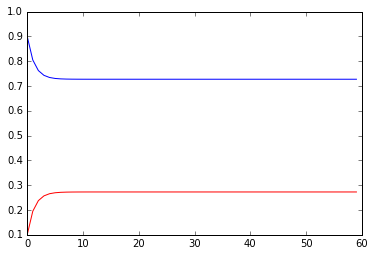

[ 0.27272727  0.72727273] vPm
[[ 0.27272727  0.72727273]
 [ 0.27272727  0.72727273]]


In [85]:
# problema apolice de seguros para carro
# duas hipoteses: Pessoa de baixo risco, pessoa de alto risco
# pessoa de alto risco: recebeu uma multa nos ultimos 12 meses
# pessoa de baixo risco: nao recebeu uma multa nos ultimos 12 meses
#-------------------------------------------------------------------
# - Probabilidades -
#-------------------------------------------------------------------
# Ao entrar pela porta da seguradora, uma pessoa tem 10% de chance de ser de risco, e 90% de chance de nao ser
# probabilidades para:
# - permanecer em alto risco no ano seguinte: 60% 
# - mudar de alto risco para baixo risco no ano seguinte: 40%
# - permanecer em baixo risco no ano seguinte: 85%
# - mudar de baixo risco para alto risco no ano seguinte: 15%

O = np.array([.10,.90],float) # probabilidade inicial "entrou pela porta"
M = np.array([[.6,.4],[.15,.85]],float) # matriz das probabilidades (matriz de transição)
print (M,O,' \n')

P1ano = np.dot(O,M) # a probabilidade ao passar um ano [estar em alto risco,estar em baixo risco]
print (P1ano,'\n')

# para dois anos

P2ano_0 = np.dot(P1ano,M) # a probabilidade apos dois anos [estar em alto risco,estar em baixo risco]
print (P2ano_0,'\n')

# ou

P2ano_1 = np.dot(O,np.linalg.matrix_power(M,2))

print (P2ano_1,'\n')

# logo, para n anos, onde n = 10

n = 10

Pnano = np.dot(O,np.linalg.matrix_power(M,n))

print (Pnano,'\n')

HR  = []
LR  = []
ano = []

N = 60

for i in range (N):
    
    Pnano0 = np.dot(O,np.linalg.matrix_power(M,i))
    HR.append(Pnano0[0])
    LR.append(Pnano0[1])
    ano.append(i)
        
plt.plot(ano,HR,'-r')
plt.plot(ano,LR,'-b')
plt.show()

print (Pnano0,'vPm')

print(np.linalg.matrix_power(M,40))

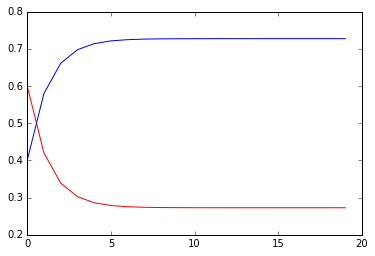

[ 0.27272736  0.72727264]


In [73]:
# So de alto risco:
# - ja começa estando em alto risco
# - permanecer em alto risco no ano seguinte: 60%, mudar: 40%
# - permanecer em baixo risco no ano seguinte: 85%, mudar: 15%

O2  = [.6,.4]
HR2  = []
LR2  = []
ano2 = []

N = 20

for i in range (N):
    
    Pnano01 = np.dot(O2,np.linalg.matrix_power(M,i))
    HR2.append(Pnano01[0])
    LR2.append(Pnano01[1])
    ano2.append(i)

plt.plot(ano2,HR2,'-r')
plt.plot(ano2,LR2,'-b')
plt.show()

print (Pnano01)

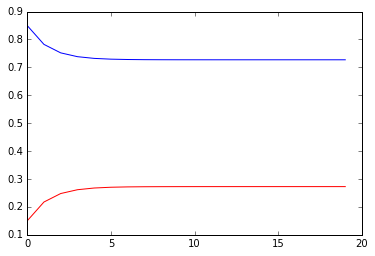

[ 0.27272724  0.72727276]


In [74]:
# So de baixo risco:
# - ja começa estando em baixo risco
# - permanecer em alto risco no ano seguinte: 60%, mudar: 40%
# - permanecer em baixo risco no ano seguinte: 85%, mudar: 15%

O3  = [.15,.85]
HR3  = []
LR3  = []
ano3 = []

N = 20

for i in range (N):
    
    Pnano02 = np.dot(O3,np.linalg.matrix_power(M,i))
    HR3.append(Pnano02[0])
    LR3.append(Pnano02[1])
    ano3.append(i)

plt.plot(ano3,HR3,'-r')
plt.plot(ano3,LR3,'-b')
plt.show()

print (Pnano02)

In [86]:
# Estado estacionario
# Em algum ponto, os vetores entrarão em estado estacionario, de forma que, na equacao vP^m, vP = v

#exemplo: seja v = [x,y], e P = [[.6,.4],[.15,.85]], qual o valor de [x,y] no estado estacionario?
# [x,y].[[.6,.4],[.15,.85]] = [x,y]
# x + y = 1 (probabilidade) | y = 1 - x
# [x,1-x].[[.6,.4],[.15,.85]] = [x,1-x]
# vP = v | vP - v = 0 | v(P-I) = 0
# [x,1-x].([[.6,.4],[.15,.85]] - [[1,0],[0,1]]) = 0
